# Compare real GDP per Capita of US and Canada (~150 years)

- read the analysis in my X accounts: WhyNotBeDirect
- Below is the link to global macro data where I get the data.
https://www.globalmacrodata.com/index.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_csv('GMD.csv')

In [3]:
df.columns

Index(['countryname', 'ISO3', 'year', 'nGDP', 'rGDP', 'rGDP_pc', 'rGDP_USD',
       'deflator', 'cons', 'rcons', 'cons_GDP', 'inv', 'inv_GDP', 'finv',
       'finv_GDP', 'exports', 'exports_GDP', 'imports', 'imports_GDP', 'CA',
       'CA_GDP', 'USDfx', 'REER', 'govexp', 'govexp_GDP', 'govrev',
       'govrev_GDP', 'govtax', 'govtax_GDP', 'govdef', 'govdef_GDP', 'govdebt',
       'govdebt_GDP', 'HPI', 'CPI', 'infl', 'pop', 'unemp', 'strate', 'ltrate',
       'cbrate', 'M0', 'M1', 'M2', 'M3', 'M4', 'SovDebtCrisis',
       'CurrencyCrisis', 'BankingCrisis'],
      dtype='object')

# Canada / US

In [4]:
df['rGDP_USD_pc'] = df['rGDP_USD']/df['pop']
df['rGDP_pc_log'] = np.log(df['rGDP_pc'])
df['rGDP_USD_pc_log'] = np.log(df['rGDP_USD_pc'])

# extract columns
list_col = ['year','nGDP','rGDP','rGDP_USD','rGDP_pc','pop','rGDP_USD_pc','rGDP_pc_log','rGDP_USD_pc_log']


df_Canada = df[df['countryname'].isin(['Canada'])][list_col].dropna()
df_US = df[df['countryname'].isin(['United States'])][list_col].dropna()

df_Canada.head()

,year,nGDP,rGDP,rGDP_USD,rGDP_pc,pop,rGDP_USD_pc,rGDP_pc_log,rGDP_USD_pc_log
7673,1870,383.98001,14619.437,11063.567,4020.0598,3.636622,3042.265023,8.299052,8.020358
7674,1871,414.23544,15217.137,11515.890,4111.8208,3.700827,3111.707278,8.321621,8.042927
7675,1872,448.92233,15057.977,11395.441,3998.3630,3.766035,3025.845509,8.293640,8.014946
7676,1873,489.58746,16571.568,12540.884,4317.4619,3.838266,3267.330527,8.370423,8.091729
7677,1874,487.35416,16970.020,12842.420,4342.9492,3.907487,3286.618403,8.376309,8.097614


# Compare US and Canada

In [11]:
where = df_Canada['year'] <= 2006

x = df_Canada[where]['year']  # Reshape to 2D array for sklearn
y = df_Canada[where]['rGDP_USD_pc_log']

x_with_const = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, x_with_const)
results = model.fit()

first_year = df_Canada['year'].min()
print("first year = ", first_year)

# Print the summary of the regression
print(results.summary())

df_Canada['trend'] = np.exp(results.predict( sm.add_constant(df_Canada['year'])  ))

first year =  1870
                            OLS Regression Results                            
Dep. Variable:        rGDP_USD_pc_log   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     5764.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          1.29e-112
Time:                        20:06:03   Log-Likelihood:                 94.851
No. Observations:                 137   AIC:                            -185.7
Df Residuals:                     135   BIC:                            -179.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.4969      0.511 

In [12]:
where = (df_US['year'] >= first_year) & (df_US['year'] <= 2006)

x = df_US[where]['year']  # Reshape to 2D array for sklearn
y = df_US[where]['rGDP_USD_pc_log']

x_with_const = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, x_with_const)
results = model.fit()

print(df_US['year'].min())

# Print the summary of the regression
print(results.summary())

df_US['trend'] = np.exp(results.predict( sm.add_constant(df_US['year'])  ))

1800
                            OLS Regression Results                            
Dep. Variable:        rGDP_USD_pc_log   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     4319.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.23e-104
Time:                        20:06:09   Log-Likelihood:                 74.545
No. Observations:                 137   AIC:                            -145.1
Df Residuals:                     135   BIC:                            -139.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.4789      0.592    -49.762    

In [18]:
# check if there is a significant difference in long-term growth rate?

list_merge = ['year','rGDP_USD_pc_log']

df_merge = df_Canada[list_merge].merge(df_US[list_merge] , how = 'inner' , on = 'year')

df_merge['rGDP_USD_pc_log_diff'] = df_merge['rGDP_USD_pc_log_y'] - df_merge['rGDP_USD_pc_log_x'] 

where = (df_merge['year'] >= first_year) & (df_merge['year'] <= 2006)

x = df_merge[where]['year']  # Reshape to 2D array for sklearn
y = df_merge[where]['rGDP_USD_pc_log_diff']

x_with_const = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, x_with_const)
results = model.fit()
# results = model.fit(cov_type = 'HAC' , cov_kwds = {'maxlags':4})

print(df_merge['year'].min())

# Print the summary of the regression
print(results.summary())



1870
                             OLS Regression Results                             
Dep. Variable:     rGDP_USD_pc_log_diff   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.006
Method:                   Least Squares   F-statistic:                    0.1229
Date:                  Wed, 05 Feb 2025   Prob (F-statistic):              0.726
Time:                          20:19:27   Log-Likelihood:                 115.83
No. Observations:                   137   AIC:                            -227.7
Df Residuals:                       135   BIC:                            -221.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0179      

In [19]:
# check if there is a significant difference in long-term growth rate?

list_merge = ['year','rGDP_USD_pc_log']

df_merge = df_Canada[list_merge].merge(df_US[list_merge] , how = 'inner' , on = 'year')

df_merge['rGDP_USD_pc_log_diff'] = df_merge['rGDP_USD_pc_log_y'] - df_merge['rGDP_USD_pc_log_x'] 

where = (df_merge['year'] >= first_year) & (df_merge['year'] <= 2006)

x = df_merge[where]['year']  # Reshape to 2D array for sklearn
y = df_merge[where]['rGDP_USD_pc_log_diff']

x_with_const = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, x_with_const)
# results = model.fit()
results = model.fit(cov_type = 'HAC' , cov_kwds = {'maxlags':4})

print(df_merge['year'].min())

# Print the summary of the regression
print(results.summary())



1870
                             OLS Regression Results                             
Dep. Variable:     rGDP_USD_pc_log_diff   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.006
Method:                   Least Squares   F-statistic:                   0.03263
Date:                  Wed, 05 Feb 2025   Prob (F-statistic):              0.857
Time:                          20:19:49   Log-Likelihood:                 115.83
No. Observations:                   137   AIC:                            -227.7
Df Residuals:                       135   BIC:                            -221.8
Df Model:                             1                                         
Covariance Type:                    HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0179      

In [65]:
df_merge[df_merge['rGDP_USD_pc_log_diff'] == df_merge['rGDP_USD_pc_log_diff'].max()]

,year,rGDP_USD_pc_log_x,rGDP_USD_pc_log_y,rGDP_USD_pc_log_diff
154,2024,10.689957,11.117163,0.427206


In [66]:
df_merge.sort_values(by = 'rGDP_USD_pc_log_diff')

,year,rGDP_USD_pc_log_x,rGDP_USD_pc_log_y,rGDP_USD_pc_log_diff
47,1917,9.046127,8.877517,-0.168610
45,1915,8.919682,8.799592,-0.120091
46,1916,9.013130,8.915474,-0.097657
42,1912,8.955635,8.866851,-0.088784
43,1913,8.971418,8.885936,-0.085482
...,...,...,...,...
17,1887,8.230754,8.581329,0.350575
20,1890,8.345918,8.700854,0.354936
22,1892,8.342138,8.717209,0.375071
153,2023,10.705579,11.094859,0.389280


# Graph

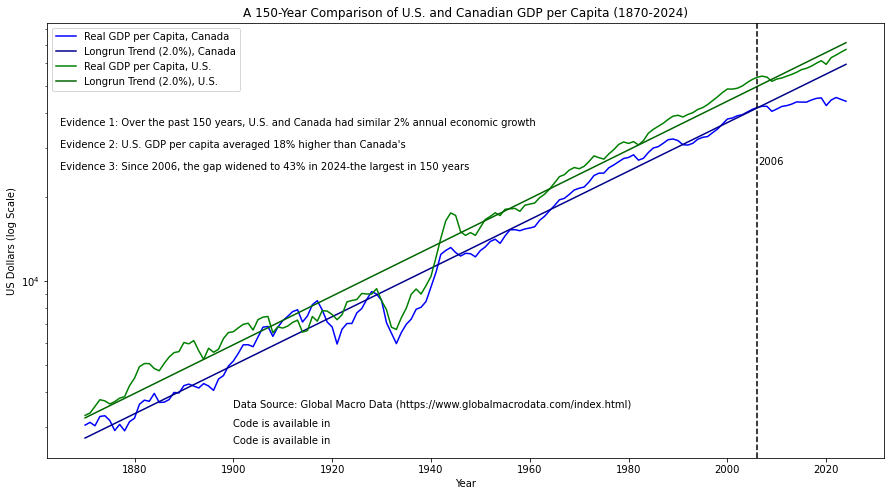

In [85]:
plt.figure(figsize=(15, 8))

where = df_US['year'] >= 1870

plt.plot(df_Canada['year'], df_Canada['rGDP_USD_pc'], color='blue', label='Real GDP per Capita, Canada')  
plt.plot(df_Canada['year'], df_Canada['trend'], color='darkblue', label='Longrun Trend (2.0%), Canada')  

plt.plot(df_US[where]['year'], df_US[where]['rGDP_USD_pc'], color='green', label='Real GDP per Capita, U.S.')  
plt.plot(df_US[where]['year'], df_US[where]['trend'], color='darkgreen', label='Longrun Trend (2.0%), U.S.')  


plt.axvline(x = 2006, color = 'black', linestyle = '--')
plt.text(2006.2, 2.6e4, '2006' , color = 'black')
plt.text(1865, 3.6e4, 'Evidence 1: Over the past 150 years, U.S. and Canada had similar 2% annual economic growth' , color = 'black')
plt.text(1865, 3.0e4, "Evidence 2: U.S. GDP per capita averaged 18% higher than Canada's"  , color = 'black')
plt.text(1865, 2.5e4, 'Evidence 3: Since 2006, the gap widened to 43% in 2024-the largest in 150 years' , color = 'black')


plt.text(1900, 3.5e3, 'Data Source: Global Macro Data (https://www.globalmacrodata.com/index.html)' , color = 'black')
plt.text(1900, 3.0e3, 'Code is available in  ' , color = 'black')
plt.text(1900, 2.6e3, 'Created by https//x.com/WhyNotBeDirect' , color = 'black')


plt.yscale('log')
plt.xlabel('Year')
plt.legend()
plt.ylabel('US Dollars (log Scale)')
plt.title('A 150-Year Comparison of U.S. and Canadian GDP per Capita (1870-2024)')
plt.show()